## Previously on Data Analysis with Python...

First, we demonstrated how to perform linear least squares regression manually. We fitted a straight line to the data by finding the optimal parameters (slope and intercept) that minimize the sum of squared differences between the observed and predicted values.


Next, we automated the linear regression process using the `curve_fit` function from the ``SciPy`` library. This function helps find the optimal parameters for the linear model without manual intervention.


Now, let's explore how we can create a linear regression model from our data using ``scikit-learn``, a powerful and widely-used machine learning library. As we are going to see, our model is trained on the original data to learn the underlying pattern in the relationship between x and y.

### NOTE

**This example provides a basic introduction to using scikit-learn for linear regression. All of these concepts, along with many others, are covered in much more detail in the elective course. [Φ-252: Εισαγωγή στην Επιστήμη Δεδομένων και τη Μηχανική Μάθηση](https://www.physics.uoc.gr/el/courses/157).**

## Linear Regression with ``scikit-learn``
To begin, let's bring in essential libraries that will assist us in creating synthetic data for our analysis and visualize the generated data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Suppress any annoying warning messages 
# Not necessary for whar we are doing here - try to avoid it
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Now let's generate sample data with a linear relationship and some random noise. We will also visualize them to get a better understanding of the underlying relationship.

In [2]:
# Use the same random seed to ensure reproducibility
np.random.seed(42)

# Generate sample data
my_x_data = np.linspace(0, 10, 1000)
my_y_data = 2 * my_x_data + 1 + np.random.normal(0, 1, len(my_x_data))

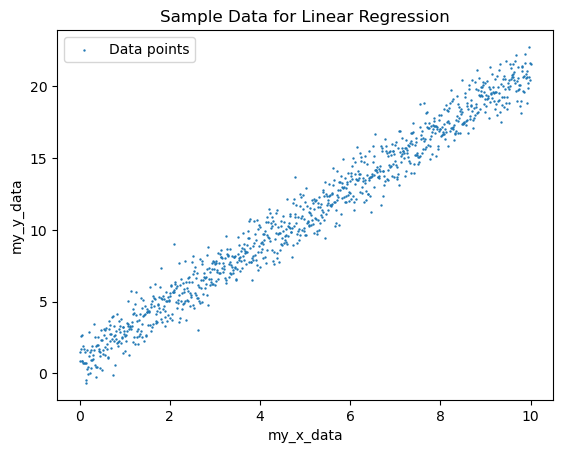

In [3]:
# Plot the data points
plt.scatter(my_x_data, my_y_data, s=0.5, label='Data points')

plt.xlabel('my_x_data')
plt.ylabel('my_y_data')
plt.title('Sample Data for Linear Regression')
plt.legend()

plt.show()

### Creating a Linear Regression Model

In scikit-learn, linear regression is implemented through the `LinearRegression` class. We begin by importing the LinearRegression class and creating an instance of this class, representing our linear regression model.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# Create a linear regression model
model = LinearRegression()

Next, we are going to reshape our data that our model will be trained on. 
It's essential to reshape our data to a 2D array because scikit-learn expects input data in this format.

In [6]:
# Reshape my_x_data to a 2D array (required by scikit-learn)
X = my_x_data.reshape(-1, 1)
y = my_y_data

### Fitting the Model to the Data
We have succesfully created an instance of the LinearRegression model. 

To make the model understand the relationship between our independent variable X and the dependent variable y, the model needs to be trained using the ``fit`` method, where X is the input data, and y is the target variable.

This process involves finding the optimal parameters for the linear regression line (slope and intercept) that best fits the training data.

>**Note**: The ``LinearRegression`` class actually implements the ordinary least squares (OLS) closed-form solutions we saw earlier. Check out the ``SGDRegressor`` class to see how you can perform linear regression using Stochastic Gradient Descent.

In [7]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

Now, our model has learned the underlying pattern in the original data.

### Making Predictions and Visualizing the Regression Line
Once the model is trained, we can use it to make predictions on new data. 

Let's see how we use the trained model to make predictions (``y_pred``) based on the input data X. Then, we will plot the original data points along with the regression line predicted by our model.

In [8]:
# Make predictions on the original data
y_pred = model.predict(X)

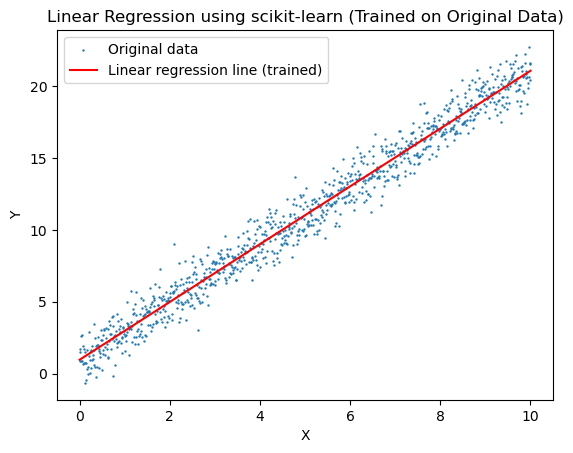

In [9]:
# Plot the original data and the linear regression line
plt.scatter(my_x_data, my_y_data, label='Original data', s=0.5)
plt.plot(my_x_data, y_pred, color='red', label='Linear regression line (trained)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression using scikit-learn (Trained on Original Data)')

plt.show()

In [10]:
print(f'Fitted Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

Fitted Line: y = 2.01x + 0.96


### Evaluating the Performance of our Model

We can assess how well our model performs by calculating the R-squared value. The R-squared value indicates how well the model fits the data. A higher R-squared value closer to 1 suggests a better fit.

In [11]:
# Calculate the R-squared value
r_squared = model.score(X, y)

# Print the R-squared value
print(f'R-squared value: {r_squared:.4f}')

R-squared value: 0.9725


The R-squared score of 0.9725 on the training data indicates that the linear regression model explains approximately 97.25% of the variance in the dependent variable within the training dataset. This suggests a strong fit of the model to the training data.

### Making Predictions on Unseen Data

Our model does a good job on the data it practiced on, but that's data it already knew and had be trained on. Now, we want to check if our model generalizes well. In other words, we want to see if it can do well on new data that has never seen before, to make sure it's really good at understanding different things.

For this reason, we'll generate additional data with a similar linear pattern as the training data, but this new data will be outside the range covered by the training set.

Then we will use our trained model to predict the y-values of the new data. Finally, we will visualize the regression line generated from our model fitted on the new data and evaluate the model's performance.

In [12]:
# Generate new data for testing
new_x_data = np.linspace(11, 15, 100)  # Use values outside the range of the training data
new_X = new_x_data.reshape(-1, 1)      # reshape the data in order to work with scikit-learn

# Generate true labels for the new data
# These are the true y-values corresponding to new_x_data
true_y_labels = 2 * new_x_data + 1 + np.random.normal(0, 1, len(new_x_data))   

In [13]:
# Use the trained model to make predictions on the new data
new_y_pred = model.predict(new_X)

# # The above is equivalent to:
# # new_y_pred = np.array([model.coef_[0] * i + model.intercept_ for i in new_x_data])

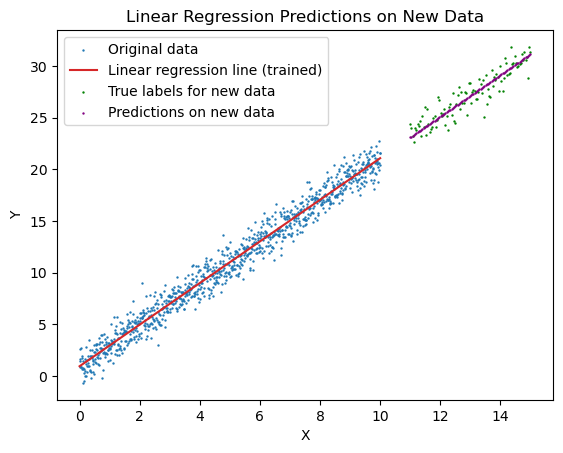

In [14]:
# Plot the original data, the regression line, and the new data with true labels and predictions
plt.scatter(my_x_data, my_y_data, label='Original data', s=0.5)
plt.plot(my_x_data, y_pred, color='tab:red', label='Linear regression line (trained)')

plt.scatter(new_x_data, true_y_labels, color='green', s=0.5, label='True labels for new data')
plt.scatter(new_x_data, new_y_pred, color='purple', s=0.5, label='Predictions on new data')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear Regression Predictions on New Data')

plt.show()

In [15]:
# Calculate the R-squared value
r_squared_new = model.score(new_X, true_y_labels)

# Print the R-squared value
print(f'R-squared value: {r_squared_new:.4f}')

R-squared value: 0.8418


We see that our model's performance dropped when applied to new data. The R-squared score dropping to 0.8418 on unseen data signals a decrease in the model's explanatory power when faced with new, previously unseen instances.
This reduction is a common scenario and can be attributed to model's exposure solely to the training data during the learning phase. The model, while performing well on familiar patterns, may struggle with data points that differ significantly from what it has encountered before. 

This phenomenon is often referred to as **overfitting**, where the model becomes too tailored to the training data and lacks the ability to generalize effectively to new, unseen instances. To enhance the model's performance on unseen data, techniques like regularization or the incorporation of more diverse training examples could be explored, striking a balance between fitting the training data well and achieving better generalization to a broader range of scenarios.